### GRAPH ###

- Facebook friend suggetions, flight routes, amazon product recommendations, google maps etc.
- Difference between graph and tree is, in tree there is only one path between two nodes.
- If edges have a value(weights), graph is called weighted graph.
  
  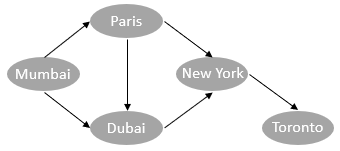
- **All Paths** (Mumbai to New York)
  - Mumbai -> Paris -> New York
  - Mumbai -> Paris -> Dubai -> New York
  - Mumbai -> Dubai -> New York
- **Shortes Path** (Minimum Stops)
  - Mumbai -> Paris -> New York
  - Mumbai -> Dubai -> New York
- For implementation, the connection between two cities(nodes) can be represented as a pair(We can create the pair with Tuple in python). Each pair is a route(edge).


In [5]:
class Graph:
    def __init__(self, edges):
        self.edges = edges # routes as edges
        self.graph_dict = {}
        for start, end in self.edges: # convert edge pair into dtictionary
            if start in self.graph_dict:
                self.graph_dict[start].append(end)
            else:
                self.graph_dict[start] = [end] 
        # print(self.graph_dict) # {'Mumbai': ['Paris', 'Dubai'], 'Paris': ['Dubai', 'New York'], 'Dubai': ['New York'], 'New York': ['Toronto']}

    def get_paths(self, start, end, path=[]):
        path = path + [start]

        # (base case)when user give same start and end
        if start == end:
            return [path]
        
        # (corner case)when user give a start with no starting edge(e.g. Toronto has no starting edge)
        if start not in self.graph_dict: # all start with starting edge are keys in graph_dict
            return []
        
        # (main case)
        paths = [] # all possible paths
        for node in self.graph_dict[start]:
            if node not in path: # if place is not visited in path
                new_paths = self.get_paths(node, end, path)
                for p in new_paths:
                    paths.append(p)
        return paths
    
    def get_shortest_path(self, start, end, path=[]):
        path = path + [start]

        if start == end:
            return path
        
        if start not in self.graph_dict:
            return None
        
        shortest_path = None
        for node in self.graph_dict[start]:
            if node not in path:
                sp = self.get_shortest_path(node, end, path)
                if sp:
                    if shortest_path is None or len(sp) < len(shortest_path):
                        shortest_path = sp
        return shortest_path
    
routes = [("Mumbai", "Paris"),
          ("Mumbai", "Dubai"),
          ("Paris", "Dubai"),
          ("Paris", "New York"),
          ("Dubai", "New York"),
          ("New York", "Toronto")]

routes_graph = Graph(routes)

print(routes_graph.get_paths("Mumbai", "New York"))
print(routes_graph.get_shortest_path("Mumbai", "New York"))


[['Mumbai', 'Paris', 'Dubai', 'New York'], ['Mumbai', 'Paris', 'New York'], ['Mumbai', 'Dubai', 'New York']]
['Mumbai', 'Paris', 'New York']
